## Lab 12 take home
##### Pranisaa Charnparttaravanit
##### st121720

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# def init_gmm(X, k):
#     m = X.shape[0]
#     n = X.shape[1]
#     Mu = np.zeros((n,k))
#     Sigma = np.zeros((k,n,n))
#     Phi = np.zeros(k)
#     order = np.random.permutation(m)
#     for j in range(k):
#         # Initially assign equal probability to each cluster/outcome
#         Phi[j] = 1/k      
#         # Ramdomly assign mean to one of the data points       
#         Mu[:,j] = X[order[j],:].T
#         # Initial covariance is identity matrix
#         Sigma[j,:,:] = np.eye(n)
#     return Phi, Mu, Sigma


# def Gaussian(X, mean, covariance):
#     k = len(mean)
#     X = X - mean.T
#     p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * np.sum(X @ np.linalg.pinv(covariance) * X, axis=1))
#     return p

# def gaussian(x, mean,covariance):
#     k = len(mean)
#     X = (x - mean).reshape(-1,1)
#     p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * (X.T @ np.linalg.pinv(covariance) @ X))
#     return p


# # Run one iteration of EM

# def iterate_em_gmm(X, threshold, Phi, Mu, Sigma):
#     m = X.shape[0]
#     n = X.shape[1]
#     k = len(Phi)
#     threshold = np.reshape(np.repeat(threshold, n*k), (n,k))
#     pj_arr = np.zeros((m,k))
    
#     # E-step: calculate w_j^i
#     W = np.zeros((m, k))
#     for j in range(k):
#         pj = Gaussian(X, Mu[:,j], Sigma[j])
#         pj_arr[:,j] = pj
#         W[:,j] = Phi[j] * pj
    
#     # W tells us what is the relative weight of each cluster for each data point
#     W[:,:] = W * np.tile(1/np.sum(W,1),(k,1)).T+0.00001
    
#     a = np.sum(W,axis=1)
# #     for i,aa in enumerate(a):
# #         #print(X[i])
# #         print(aa)

#     # M-step: adjust mean and sigma
#     Phi[:] = sum(W) / m
#     Mu_previous = Mu.copy()
#     for j in range(k):
#         # Split cluster specific W for each dimension
#         Wj = np.tile(W[:,j],(n,1)).T
#         # Compute Mu for each variable for each cluster
#         Mu[:,j] = sum(X * Wj)/sum(Wj)
#         #print(Mu)
#         Muj = np.tile(Mu[:,j],(m,1))
#         Sigma[j,:,:] = np.matmul((X - Muj).T, (X - Muj) * Wj) / sum(W[:,j])

#     if (abs(Mu-Mu_previous) <= threshold).all():
#         converged = True
#     else:
#         converged = False

#     labels = np.argmax(pj_arr, axis = 1)
#     pj = np.max(pj_arr,axis=1)
#     X_label = np.insert(X, 2, labels, axis=1)
#     return converged, pj, X_label


In [110]:
def init_gmm(X, k):
    m = X.shape[0]
    n = X.shape[1]
    Mu = np.zeros((n,k))
    Sigma = np.zeros((k,n,n))
    Phi = np.zeros(k)
    order = np.random.permutation(m)
    for j in range(k):
        # Initially assign equal probability to each cluster/outcome
        Phi[j] = 1/k      
        # Ramdomly assign mean to one of the data points       
        Mu[:,j] = X[order[j],:].T
        # Initial covariance is identity matrix
        Sigma[j,:,:] = np.eye(n)
    return Phi, Mu, Sigma


def Gaussian(X, mean, covariance):
    k = len(mean)
    print(X.shape, mean.T.shape)
    X = X - mean.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * np.sum(X @ np.linalg.pinv(covariance) * X, axis=1))
    return p

def gaussian(x, mean,covariance):
    k = len(mean)
    X = (x - mean).reshape(-1,1)
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * (X.T @ np.linalg.pinv(covariance) @ X))
    return p


# Run one iteration of EM

def iterate_em_gmm(X, threshold, Phi, Mu, Sigma):
    m = X.shape[0]
    n = X.shape[1]
    k = len(Phi)
    threshold = np.reshape(np.repeat(threshold, n*k), (n,k))
    pj_arr = np.zeros((m,k))
    
    # E-step: calculate w_j^i
    W = np.zeros((m, k))
    for j in range(k):
        pj = Gaussian(X, Mu[:,j], Sigma[j])
        pj_arr[:,j] = pj
        W[:,j] = Phi[j] * pj
    
    # W tells us what is the relative weight of each cluster for each data point
    W[:,:] = W * np.tile(1/np.sum(W,1),(k,1)).T+0.00001
    
    a = np.sum(W,axis=1)
#     for i,aa in enumerate(a):
#         #print(X[i])
#         print(aa)

    # M-step: adjust mean and sigma
    Phi[:] = sum(W) / m
    Mu_previous = Mu.copy()
    for j in range(k):
        # Split cluster specific W for each dimension
        Wj = np.tile(W[:,j],(n,1)).T
        # Compute Mu for each variable for each cluster
        Mu[:,j] = sum(X * Wj)/sum(Wj)
        #print(Mu)
        Muj = np.tile(Mu[:,j],(m,1))
        Sigma[j,:,:] = np.matmul((X - Muj).T, (X - Muj) * Wj) / sum(W[:,j])

    if (abs(Mu-Mu_previous) <= threshold).all():
        converged = True
    else:
        converged = False

    labels = np.argmax(pj_arr, axis = 1)
    pj = np.max(pj_arr,axis=1)
    X_label = np.insert(X, 2, labels, axis=1)
    return converged, pj, X_label


### Example 3 Customer segmentation

This example is based on [Nguyen Hanh's tutorial on Medium.com](https://medium.com/@nguyenbaha/buiding-customer-segmentation-by-gmm-from-scratch-4ea6adc3da1c). In this example we use the Kaggle [OnlineRetail.csv](https://www.kaggle.com/vijayuv/onlineretail) dataset for customer segmentation. 

In [62]:
data = pd.read_csv('Online_Retail.csv')
data = data.iloc[0:5000,:]
print(data.head())
data = data.drop(['InvoiceNo','Description', 'CustomerID'], axis = 1)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  TotalSum  
0   12/1/2010       2.55      17850  United Kingdom     15.30  
1   12/1/2010       3.39      17850  United Kingdom     20.34  
2   12/1/2010       2.75      17850  United Kingdom     22.00  
3   12/1/2010       3.39      17850  United Kingdom     20.34  
4   12/1/2010       3.39      17850  United Kingdom     20.34  


In [63]:
print(data.dtypes)

StockCode       object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
Country         object
TotalSum       float64
dtype: object


Let's view the categorical and numeric columns:

In [64]:
categorical_colmns = data.select_dtypes(include=['object']).columns
print(categorical_colmns)
numerical_colmns = data._get_numeric_data().columns
print(numerical_colmns)

Index(['StockCode', 'InvoiceDate', 'Country'], dtype='object')
Index(['Quantity', 'UnitPrice', 'TotalSum'], dtype='object')


In [65]:
def missing_percentage(data):
    """This function takes a DataFrame(df) as input and returns two columns, 
     total missing values and total missing values percentage"""
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])


missing_percentage(data)

,Total,Percent
TotalSum,48,0.96
Country,12,0.24
UnitPrice,0,0.00
InvoiceDate,0,0.00
Quantity,0,0.00
StockCode,0,0.00


Next, let's fill the "na" values with "No information" and 0

In [66]:
data[categorical_colmns] = data[categorical_colmns].fillna("No information")
data[numerical_colmns] = data[numerical_colmns].fillna(0)

print(data.head())

  StockCode  Quantity InvoiceDate  UnitPrice         Country  TotalSum
0    85123A         6   12/1/2010       2.55  United Kingdom     15.30
1     71053         6   12/1/2010       3.39  United Kingdom     20.34
2    84406B         8   12/1/2010       2.75  United Kingdom     22.00
3    84029G         6   12/1/2010       3.39  United Kingdom     20.34
4    84029E         6   12/1/2010       3.39  United Kingdom     20.34


In [67]:
def category_to_numeric(categorical_columns):
    i = 0;
    columnname = '';
    while i < len(categorical_colmns):
        col_idx = data.columns.get_loc(categorical_colmns[i])
        distinct_values = data[categorical_colmns[i]].unique()
        j = 0;    
        for val in distinct_values:
            idx = np.where(data[categorical_colmns[i]] == val);
            data.iloc[idx[0],col_idx] = j            
            j = j + 1;
        i = i + 1;
        
        
category_to_numeric(data[categorical_colmns])

data = data.astype('float64')
print(data.head())

   StockCode  Quantity  InvoiceDate  UnitPrice  Country  TotalSum
0        0.0       6.0          0.0       2.55      0.0     15.30
1        1.0       6.0          0.0       3.39      0.0     20.34
2        2.0       8.0          0.0       2.75      0.0     22.00
3        3.0       6.0          0.0       3.39      0.0     20.34
4        4.0       6.0          0.0       3.39      0.0     20.34


In [68]:
Mu = np.std(data[numerical_colmns])
Sigma = np.mean(data[numerical_colmns])
print(Mu)
print(Sigma)

Quantity     146.544560
UnitPrice      5.908027
TotalSum      65.901813
dtype: float64
Quantity     10.941200
UnitPrice     3.252928
TotalSum     22.146162
dtype: float64


In [69]:
# Check for outliers

def cnt_outlier(data,sigma, mu, inc_cols=[]):
    num_cols = data.select_dtypes(include=[np.number]).columns
    num_cols = [e for e in num_cols if e in inc_cols]
    outlier = (data[numerical_colmns]-mu).abs() > sigma**2
    return outlier.sum()

cnt_outlier(data,Sigma,Mu, numerical_colmns).sort_values(ascending=False)

Quantity     4650
UnitPrice      56
TotalSum       12
dtype: int64

In [70]:
if len(data[data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(data[data.duplicated()]))
    print(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
    data.drop_duplicates(inplace=True)
else:
    print("No duplicated entries found")

No. of duplicated entries:  987
      StockCode  Quantity  InvoiceDate  UnitPrice  Country  TotalSum
4099        0.0       2.0          2.0       2.95      0.0       5.9
4131        0.0       2.0          2.0       2.95      0.0       5.9
4190        0.0       2.0          2.0       2.95      0.0       5.9
0           0.0       6.0          0.0       2.55      0.0      15.3
49          0.0       6.0          0.0       2.55      0.0      15.3


In [71]:
X = data.values
print(X.shape)

(4013, 6)


In [72]:
X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)

X = (X-X_mean)/X_std

In [73]:
far = np.sum(np.abs(X) > 5,axis=1)
far_index = np.where(far == 0)[0]
print(far_index)

[   0    1    2 ... 4003 4004 4005]


In [74]:
X = X[far_index,:]
print(X)
print(X.shape)

[[-1.3238868  -0.03572409 -1.0726451  -0.11163787 -0.26564736 -0.11949508]
 [-1.32140824 -0.03572409 -1.0726451   0.02039671 -0.26564736 -0.05026551]
 [-1.31892968 -0.02348829 -1.0726451  -0.08020106 -0.26564736 -0.0274637 ]
 ...
 [-0.67450298 -0.06631359  1.5196613  -0.04876426 -0.26564736 -0.28913501]
 [-0.97440925 -0.03572409  1.5196613   0.26560379 -0.26564736  0.0783037 ]
 [ 1.08775616 -0.29267589  1.5196613  -0.18237068 -0.26564736 -1.36809992]]
(3920, 6)


### To find k clusters

In [16]:
max_k = 10

likelihoods = []
threshold = np.matrix(0.01)

for k in range(2,max_k+1):
    print(f"====== {k} ======")
    likelihood = -float('inf')
    
    for attempt in range(10):
        Phi, Mu, Sigma = init_gmm(X, k)

        converged = False
        while not converged:
            converged, pj, X_label = iterate_em_gmm(X, threshold, Phi, Mu, Sigma)

        l = np.mean(np.log(pj))
        if(l > likelihood):
            likelihood = l
        
    print(likelihood)
    likelihoods.append(likelihood)

====== 2 ======
2.61619769783081
====== 3 ======
3.6668576915083855
====== 4 ======
4.759639723171888
====== 5 ======
5.864443272744644
====== 6 ======
6.306439892465713
====== 7 ======
6.609865630170553
====== 8 ======
7.545378417480134
====== 9 ======
8.010002465225202
====== 10 ======
8.239350813016237


Text(0, 0.5, 'likelihoods')

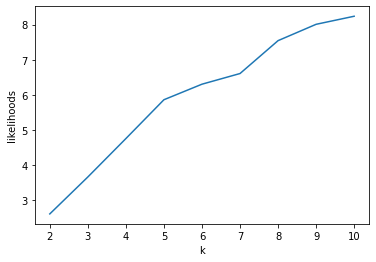

In [17]:
plt.plot(range(2,max_k+1),likelihoods)
plt.xlabel('k')
plt.ylabel('likelihoods')

### Report:
From the graph above, the graph seems to have an elbow at 5. So 5 is selected as the number of clusters for this problem.

### selected k = 5

In [75]:
k = 5
threshold = np.matrix(.01)

print(k,end= "\t")
likelihood = -float('inf')

for attempt in range(5):
    Phi, Mu, Sigma = init_gmm(X, k)

    converged = False
    while not converged:
        converged, pj, X_label = iterate_em_gmm(X, threshold, Phi, Mu, Sigma)

    l = np.mean(np.log(pj))
    if(l > likelihood):
        likelihood = l
        best_Phi = Phi
        best_Mu = Mu
        best_Sigma = Sigma

5	

In [76]:
import numpy as np
import pandas as pd 
import scipy as stats

df = pd.DataFrame(X,columns = ['StockCode','Quantity','InvoiceDate','UnitPrice','Country','TotalSum'])
df.head()



,StockCode,Quantity,InvoiceDate,UnitPrice,Country,TotalSum
0,-1.323887,-0.035724,-1.072645,-0.111638,-0.265647,-0.119495
1,-1.321408,-0.035724,-1.072645,0.020397,-0.265647,-0.050266
2,-1.318930,-0.023488,-1.072645,-0.080201,-0.265647,-0.027464
3,-1.316451,-0.035724,-1.072645,0.020397,-0.265647,-0.050266
4,-1.313973,-0.035724,-1.072645,0.020397,-0.265647,-0.050266


In [20]:
# def mahalanobis(x=None, data=None, cov=None):

#     x_mu = x - np.mean(data)
#     if not cov:
#         cov = np.cov(data.values.T)
#     inv_covmat = np.linalg.inv(cov)
#     left = np.dot(x_mu, inv_covmat)
#     mahal = np.dot(left, x_mu.T)
#     return mahal.diagonal()

# df['mahalanobis'] = mahalanobis(x=df, data=df[['StockCode','Quantity','InvoiceDate','UnitPrice','Country','TotalSum']])

# # print(np.min(df['mahalanobis']))
# df.head()


In [21]:
# from scipy.stats import chi2

# #calculate p-value for each mahalanobis distance 
# df['p'] = 1 - chi2.cdf(df['mahalanobis'], 3)

# #display p-values for first five rows in dataframe
# df.head()


In [22]:
# row_ix = np.where(df['mahalanobis'] > 60)

In [23]:
# plt.figure(figsize=(10,6))
# plt.scatter(df['StockCode'],df['mahalanobis'],marker=".",c=pj,cmap='viridis')
# plt.scatter(df.iloc[row_ix[0],0],df.iloc[row_ix[0],6],marker="o",facecolor="none",edgecolor="r",s=70)
# plt.ylabel("Mahalanobis Distance")

In [96]:
def Mahalanobis(X,mean,covariance):
    n= len(mean)
    X= X-mean.T
    p = np.sqrt(np.sum(X@np.linalg.pinv(covariance)*X,axis = 1))
    return p

def mahalanobis_distance(X_labeled,Mu, Sigma):
    m = X_labeled.shape[0]
    n = X_labeled.shape[1] - 1
    X = X_labeled[:,0:-1]
    labels = X_labeled[:,-1].astype(int)
    k = max(labels) + 1
    md_array = np.zeros((m,k))
    for j in range(k):
        md_array[:,j] = Mahalanobis(X, Mu[:,j],Sigma[j,:,:])
    return md_array

mahala_thresh = 5

md_c = mahalanobis_distance(X_label,Mu,Sigma)
print(md_c)

[[  7.17053411  29.17894943  46.16959581  47.14654199   3.99583483]
 [  7.14899067  53.29445942  83.39580619  86.57453702   3.92400402]
 [  7.15802384  34.86429396  54.70653792  57.3512315    3.85620126]
 ...
 [ 14.77216832  41.39749521  68.34388419  65.75402383   3.5567972 ]
 [ 14.61300799  98.78804844 155.76367659 160.84033915   3.21293043]
 [ 13.98289143  17.52273815  28.00557736 102.18584693   6.26788366]]


In [101]:
n = X.shape[1]
m = X.shape[0]
print(X.shape)
labels = np.argmin(md_c, axis = 1) # find most probable cluster
md_c_ = md_c[np.arange(0,m,1),labels]
print(md_c_)
print(Mu.shape)

(3920, 6)
[3.99583483 3.92400402 3.85620126 ... 3.5567972  3.21293043 6.26788366]
(6, 5)


In [98]:
outliers_c = np.nonzero(md_c_ > mahala_thresh)[0]

(1, 2) (6,)


ValueError: operands could not be broadcast together with shapes (1,2) (6,) 

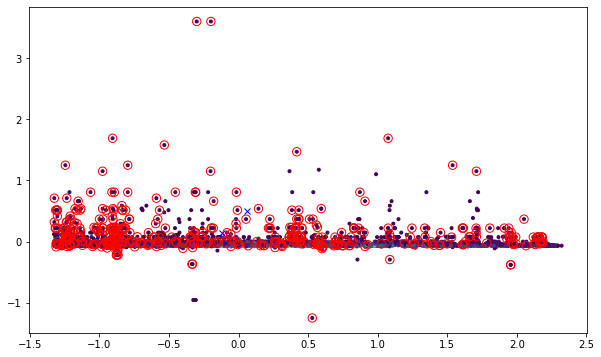

In [113]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],marker=".",c=pj,cmap='viridis');
plt.scatter(X[outliers_c,0],X[outliers_c,1],marker="o",facecolor="none",edgecolor="r",s=70);
plt.plot(Mu[0,0], Mu[1,0],'bx',Mu[0,1], Mu[1,1],'bx', Mu[0,2], Mu[1,2],'bx')

for c in np.arange(0,k):    
    X_class = X[np.where(X_label[:,2] == c)[0],:]
    xlist = np.linspace(min(X_class[:,0]), max(X_class[:,0]), 30)
    ylist = np.linspace(min(X_class[:,1]), max(X_class[:,1]), 30)
    
    XX, YY = np.meshgrid(xlist, ylist)
    Z = np.zeros(XX.shape)
    i = 0
    while i < XX.shape[0]:
        j = 0
        while j < XX.shape[0]:
            pt = np.array([[XX[i,j], YY[i,j]]])
            Z[i,j] = Gaussian(pt, Mu[:,c].T, Sigma[c])[0]
            j = j + 1
        i = i + 1    
    cp = plt.contour(XX, YY, Z)
plt.title('Inliers and outliers according to GMM model')
plt.show()